In [1]:
import json

import geopandas as gpd
import invest_ucm_calibration as iuc
import rasterio as rio

from lausanne_greening_scenarios import utils

In [6]:
calibrated_params_filepath = '../data/raw/invest-calibrated-params.json'
agglom_extent_filepath = '../data/raw/agglom-extent/agglom-extent.shp'
agglom_lulc_filepath = '../data/raw/agglom-lulc.tif'
biophysical_table_filepath = '../data/processed/biophysical-table.csv'
ref_et_filepath = '../data/interim/ref-et.tif'
dst_res = 200

In [14]:
# Compute an air temperature array from the calibrated InVEST urban
# cooling model
# 0. Preprocess the inputs
# get the agglomeration extent
agglom_extent_gdf = gpd.read_file(agglom_extent_filepath)
crs = agglom_extent_gdf.crs
ref_geom = agglom_extent_gdf.loc[0]['geometry']

# use the ref geometry to obtain the reference grid (data array) with the
# target resolution
ref_da = utils.get_ref_da(ref_geom, dst_res, dst_fill=0, dst_crs=crs)

with open(calibrated_params_filepath) as src:
    model_params = json.load(src)

ucm_wrapper = iuc.UCMWrapper(
    agglom_lulc_filepath,
    biophysical_table_filepath,
    agglom_extent_filepath,
    'factors',
    ref_et_filepath,
    t_refs=[22],  # not used
    uhi_maxs=[8],  # not used
    t_raster_filepaths=[agglom_lulc_filepath],  # not used
    extra_ucm_args=model_params)
T_arr = ucm_wrapper.predict_t_arr(0)

In [ ]:
station_tair_filepath = '../../lausanne-heat-islands/data/interim/station-tair.csv'
station_locations_filepath = '../../lausanne-heat-islands/data/raw/stations/station-locations.csv'

In [21]:
station_location_df = 
station_tair_df = pd.read_csv(, index_col=0)
station_tair_df.index = pd.to_datetime(station_tair_df.index)

In [22]:
station_tair_df.loc['2019-07-24']

BOVDCH                NaN
BOVDMR                NaN
BOVDSO             28.100
NABLAU             31.300
PUY                29.800
VD_Lausanne_PdL    30.438
VD_Bussigny        30.423
VD_Morges          30.997
BOURG-EN-LAVAUX    29.400
MARCELIN           28.000
PULLY              29.800
WSLLAF             27.000
Name: 2019-07-24 00:00:00, dtype: float64

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

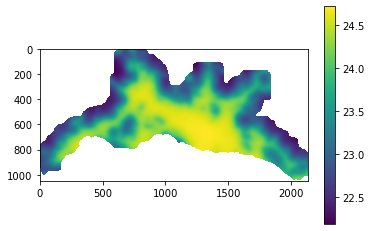

In [15]:
plt.imshow(np.where(T_arr > 0, T_arr, np.nan))
plt.colorbar()